<a href="https://colab.research.google.com/github/TusharPandey14/ML01/blob/main/Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem :**

In [8]:
#importing libraries
import numpy as np # used for mathematical calculations 
import pandas as pd # creating and storing the data in dataframes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Loading the dataset

In [10]:
data=pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [11]:
data.shape

(9999, 785)

# Visualizing the Data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
data.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.443144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
plt.scatter(x =data.study_hours, y = data.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

AttributeError: ignored

## Preparing the data for Machine after clearing the null data

In [ ]:
# data clearing
# if there is a null value it will return true
data.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [ ]:
#total count of null 
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
#taking mean and putting them in place of the null values
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
data2=data.fillna(data.mean())

In [ ]:
#splitting the dataset 
X=data2.drop("student_marks",axis="columns")
y=data2.drop("study_hours",axis="columns")

In [ ]:
#Training 
# X= independent , y=dependent , data used for testing = 20% , randomly value will be taken 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

## Selecting a model and training it 

In [ ]:
# linear regression 
# y= m * x + c
from sklearn.linear_model import LinearRegression
lr=LinearRegression() # created an object 


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[3.93571802]])

In [ ]:
lr.intercept_

array([50.44735504])

In [ ]:
m=3.93571802
c=50.44
y=m*4+c
y

66.18287208

In [ ]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.19

In [ ]:
#testing data of users
y_pred=lr.predict(X_test)

In [ ]:
# merging the values of users by the use of numpy
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["Study_hours","Student Marks_original","Student_marks_predicted"])


,Study_hours,Student Marks_original,Student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## Fine Tuning our Model

In [ ]:
lr.score(X_train,y_train) #shows accuracy of our Model

0.9589875741425085

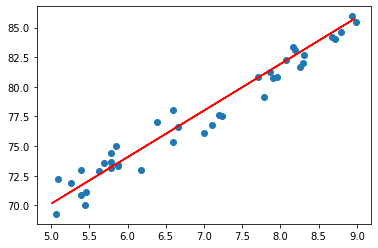

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

SAVING MODEL 


In [7]:
import joblib
joblib.dump(lr,"Marks_predictor.pkl")

NameError: ignored

In [4]:
Project=joblib.load("Marks_predictor.pkl")

FileNotFoundError: ignored

In [ ]:
if (Project.predict([[13]])[0][0])>=100 : print("You are doing Great , but take Care of your Health") 
else : print((Project.predict([[13]])[0][0]))
 

You are doing Great , but take Care of your Health


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
